In [285]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

In [2]:
def size2n(array, direction='up'):
    if direction not in ['up', 'down']:
        raise ValueError( '"{}"'.format(direction)
                         + ' is not possible argument for the function. Use "up" or "down"')
    elif len(array) == 0:
        raise ValueError("The array cannot be empty. len(array) = 0")
    else:
        pass
    
    obs_points = len(array)
    if obs_points & (obs_points - 1):
        x = bin(obs_points)
        if direction == 'up':
            x_high = '0b1' + '0'*(len(x[2:]))
            add_points = int(x_high, 2) - obs_points
            return np.hstack([array, np.zeros(add_points)])
        else:
            x_low = '0b1' + '0'*(len(x[3:]))
            add_points = obs_points - int(x_low, 2)
            return array[:-add_points]
    else:
        return array

0.8333333333333334


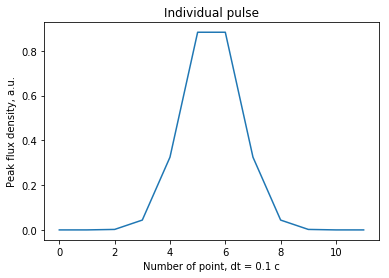

In [18]:
period_s = 1.2 # Период исскуственного пульсара
demen = 10e0
pulse = signal.gaussian(period_s*demen, std=1, sym=True)
plt.close()
plt.title('Individual pulse')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.plot(pulse)
print(1/period_s)

In [167]:
ampl_noise = 1
len_noise_left = 1
len_noise_right = 1
idx = 1
obser = []
for i in range(10):
    obser.append([])
    for j in range(200):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, ampl_noise, len(pulse)))

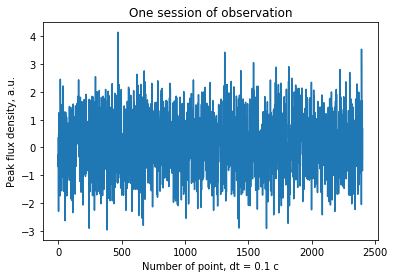

In [168]:
plt.close()
plt.plot(obser[idx])
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [49]:
# Звездные сутки 86164,090530833 с или 861641 точек между двумя точками в звездных сутками
# Размер массива точек 861641 - 200 = 861441

In [169]:
joined_array_zero = np.hstack([obser[0], np.zeros(861441), 
                               obser[1], np.zeros(861441),
                               obser[2], np.zeros(861441),
                               obser[3], np.zeros(861441),
                               obser[4], np.zeros(861441)
                              ])
#joined_array_full = np.hstack([i for i in obser[:3]])

In [148]:
print(len(joined_array_zero))

4319205


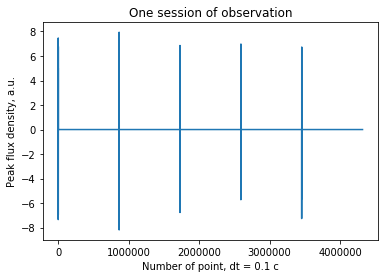

In [149]:
plt.close()
plt.plot(joined_array_zero)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

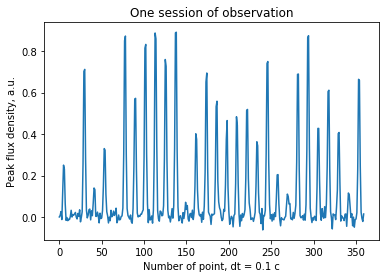

In [54]:
plt.close()
plt.plot(joined_array_full)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [170]:
noised_obser = joined_array_zero
obs_points = len(noised_obser)
fs = demen # частотота дискретизации временных рядов 
f_origin, Pxx_den_origin = signal.periodogram(noised_obser, fs)
peaks_origin, _ = signal.find_peaks(Pxx_den_origin, height=0.4*max(Pxx_den_origin))
main_harm = f[peaks_origim][0]
print('*** ' + 'Оригинальный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)

noised_obser = size2n(noised_obser, 'up')
obs_points = len(noised_obser)
f_2n, Pxx_den_2n = signal.periodogram(noised_obser, fs)
peaks_2n, _ = signal.find_peaks(Pxx_den_2n, height=0.4*max(Pxx_den_2n))
main_harm = f[peaks_2n][1]
print('*** ' + 'Увеличенный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)

*** Оригинальный массив ***
Основная гармоника:  5.9604644775390625e-06
Неточность определения:  0.8333273728688558
Размер массива:  4319205
Отношение к периоду:  3599337.5
*** Увеличенный массив ***
Основная гармоника:  1.1920928955078125e-05
Неточность определения:  0.8333214124043783
Размер массива:  8388608
Отношение к периоду:  6990506.666666667


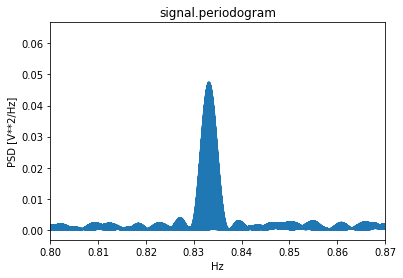

In [171]:
plt.plot(f_origin, Pxx_den_origin)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0.8, 0.87)
plt.show()

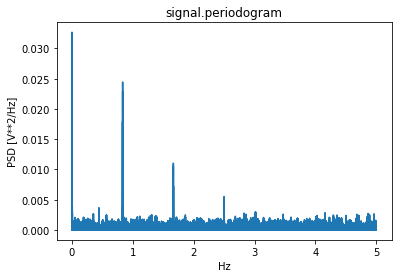

In [172]:
plt.plot(f_2n, Pxx_den_2n)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
#plt.xlim(0.8, 0.87)
plt.show()

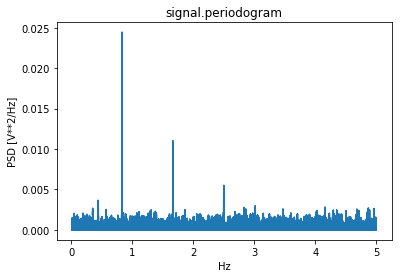

In [173]:
tres = 10000
plt.plot(f_2n[tres:],Pxx_den_2n[tres:])
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
#plt.xlim(0.8, 0.87)
plt.show()

In [174]:
f_tresed = f_2n[tres:]
Pxx_den_tresed = Pxx_den_2n[tres:]

In [179]:
peaks_origin, _ = signal.find_peaks(Pxx_den_tresed, height=0.996*max(Pxx_den_tresed))
true_harm = 1/period_s
main_harm = f_tresed[peaks_origin][0]
j = 0
for i in f_tresed[peaks_origin][:]:
    x = 100*Pxx_den_tresed[np.where(f_tresed == i)]
    if True :#x[0] > 2.84:
        print(j ,i, i/main_harm, i/true_harm, x[0])
    j +=1

0 0.8330583572387695 1.0 0.9996700286865234 2.4419945377080796
1 0.8331394195556641 1.0000973068887553 0.9997673034667969 2.444762596576247
2 0.8332204818725586 1.0001946137775106 0.9998645782470703 2.4386476454221273
3 0.8332550525665283 1.0002361123035974 0.999906063079834 2.4390282340568117
4 0.8333361148834229 1.0003334191923527 1.0000033378601074 2.435461460865631


In [92]:
peaks_2n, _ = signal.find_peaks(Pxx_den_2n, height=0.3*max(Pxx_den_2n))
true_harm = 1/period_s
main_harm = f[peaks_2n][0]
for i in f[peaks_2n][300:]:
    print(i, i/main_harm, i/true_harm)

0.8324682712554932 698325.0 0.9989619255065918
0.8324790000915527 698334.0 0.9989748001098633
0.8324909210205078 698344.0 0.9989891052246094
0.8325028419494629 698354.0 0.9990034103393555
0.832514762878418 698364.0 0.9990177154541016
0.8325254917144775 698373.0 0.999030590057373
0.8325374126434326 698383.0 0.9990448951721191
0.8325493335723877 698393.0 0.9990592002868652
0.8325600624084473 698402.0 0.9990720748901367
0.8325719833374023 698412.0 0.9990863800048828
0.8325839042663574 698422.0 0.9991006851196289
0.8325958251953125 698432.0 0.999114990234375
0.8326065540313721 698441.0 0.9991278648376465
0.8326184749603271 698451.0 0.9991421699523926
0.8326303958892822 698461.0 0.9991564750671387
0.8326411247253418 698470.0 0.9991693496704102
0.8326530456542969 698480.0 0.9991836547851562
0.832664966583252 698490.0 0.9991979598999023
0.832676887512207 698500.0 0.9992122650146484
0.8326876163482666 698509.0 0.9992251396179199
0.8326995372772217 698519.0 0.999239444732666
0.8327114582061768 

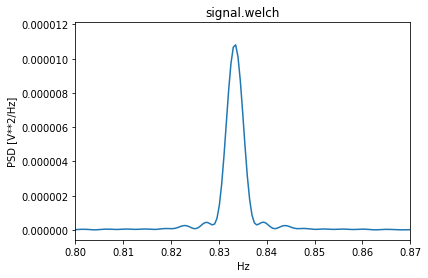

In [95]:
f_w_origin, Pxx_spec_origin = signal.welch(joined_array_zero, fs, 'flattop', 2048*10, scaling='spectrum')
plt.plot(f_w_origin, Pxx_spec_origin)
plt.title('signal.welch')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0.8, 0.87)
plt.show()

In [98]:
peaks_w_origin, _ = signal.find_peaks(Pxx_spec_origin, height=0.3*max(Pxx_spec_origin))
true_harm = 1/period_s
main_harm = f_w_origin[peaks_w_origin][1]
for i in f_w_origin[peaks_w_origin][:]:
    print(i, i/main_harm, i/true_harm)

0.00048828125 0.0005858230814294083 0.0005859375
0.83349609375 1.0 1.0001953125
1.66650390625 1.9994141769185705 1.9998046875


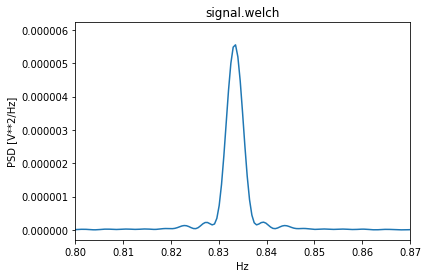

In [99]:
f_w_2n, Pxx_spec_2n = signal.welch(size2n(joined_array_zero, 'up'), fs,
                                           'flattop', 2048*10, scaling='spectrum')
plt.plot(f_w_2n, Pxx_spec_2n)
plt.title('signal.welch')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0.8, 0.87)
plt.show()

In [100]:
peaks_w_2n, _ = signal.find_peaks(Pxx_spec_2n, height=0.3*max(Pxx_spec_2n))
true_harm = 1/period_s
main_harm = f_w_2n[peaks_w_2n][1]
for i in f_w_2n[peaks_w_2n][:]:
    print(i, i/main_harm, i/true_harm)

0.00048828125 0.0005858230814294083 0.0005859375
0.83349609375 1.0 1.0001953125
1.66650390625 1.9994141769185705 1.9998046875
